In [68]:
import pandas as pd
import numpy as np
from tensorflow import keras, optimizers
from tensorflow.keras import callbacks
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression

# Đọc data FILE CSV đính kèm

In [69]:
df = pd.read_csv("37Flas.csv")
df = df.iloc[:, 1:]
df.head()

,Act,E HOMO,E LUMO,E total,C8,C7,C6,C5,C10,C9,...,C4P,C3P,C2P,SUR,VOL,HYD,LOGP,REF,POL,Act=log(1/Ki)
0,1.15,-9.40,-1.03,-65836.16,0.002,-0.014,0.049,-0.007,0.055,0.112,...,-0.031,-0.031,-0.025,373.49,726.58,-4.33,1.04,82.60,27.98,1.15
1,0.90,-9.18,-0.88,-61493.79,0.001,-0.025,-0.019,-0.019,0.054,0.112,...,-0.031,-0.031,-0.025,369.82,717.39,-3.53,1.14,79.35,27.19,0.90
2,0.79,-9.23,-1.00,-64991.56,0.002,-0.009,0.072,-0.002,0.055,0.112,...,-0.031,-0.031,-0.025,364.22,708.58,-4.34,0.77,79.78,27.28,0.79
3,0.56,-9.78,-1.48,-74907.58,0.003,-0.004,0.111,0.002,0.055,0.112,...,-0.031,-0.031,-0.025,387.07,727.72,-10.40,0.17,81.29,27.20,0.56
4,0.24,-9.06,-0.93,-64817.91,0.004,0.003,0.102,0.010,0.056,0.113,...,-0.031,-0.031,-0.025,343.82,686.81,-11.43,-0.04,76.67,25.99,0.24


## Scale data theo pp chuẩn, chia train test

In [70]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [71]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=192)

---

# Model NN

- Áp dụng điều kiện dừng để tránh overfit (early stop)

### - ReLu Activation

In [73]:
def gen_model(layers: list=[], input_shape: tuple=()):
    model = None
    if (len(layers) != 0):
        model = keras.models.Sequential(layers)
    else:
        model = keras.models.Sequential([
            keras.layers.Input(shape=input_shape),
            keras.layers.Dense(128, activation="relu"),
            keras.layers.Dense(128, activation="relu"),
            keras.layers.Dense(1, activation="linear")
            # keras.layers.Dense(3, activation="softmax")
        ])

    model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mae"])

    return model


model = gen_model(input_shape=(X.shape[1],))

In [74]:
early_stop = callbacks.EarlyStopping(monitor="loss", mode="min", min_delta=1e-7,patience=4, restore_best_weights=True, verbose=True)
history = model.fit(X_train, y_train, epochs=100, callbacks=[early_stop])

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.8043 - mae: 0.7032
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.5809 - mae: 0.5901
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.4174 - mae: 0.5086
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.3058 - mae: 0.4335
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.2314 - mae: 0.3753
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1837 - mae: 0.3316
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.1528 - mae: 0.2965
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.1317 - mae: 0.2698
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1140 - mae: 0.2490
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0968 - mae: 0.2320
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0793 - mae: 0.2208
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0619 - mae: 0.2038
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step 

- So sánh sử dụng MAE

In [75]:
y_pred = model.predict(X_test)
np.mean(np.abs(y_pred[0] - y_test))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


0.8094728004932404

- Biểu đồ loss và MAE với mỗi epoch

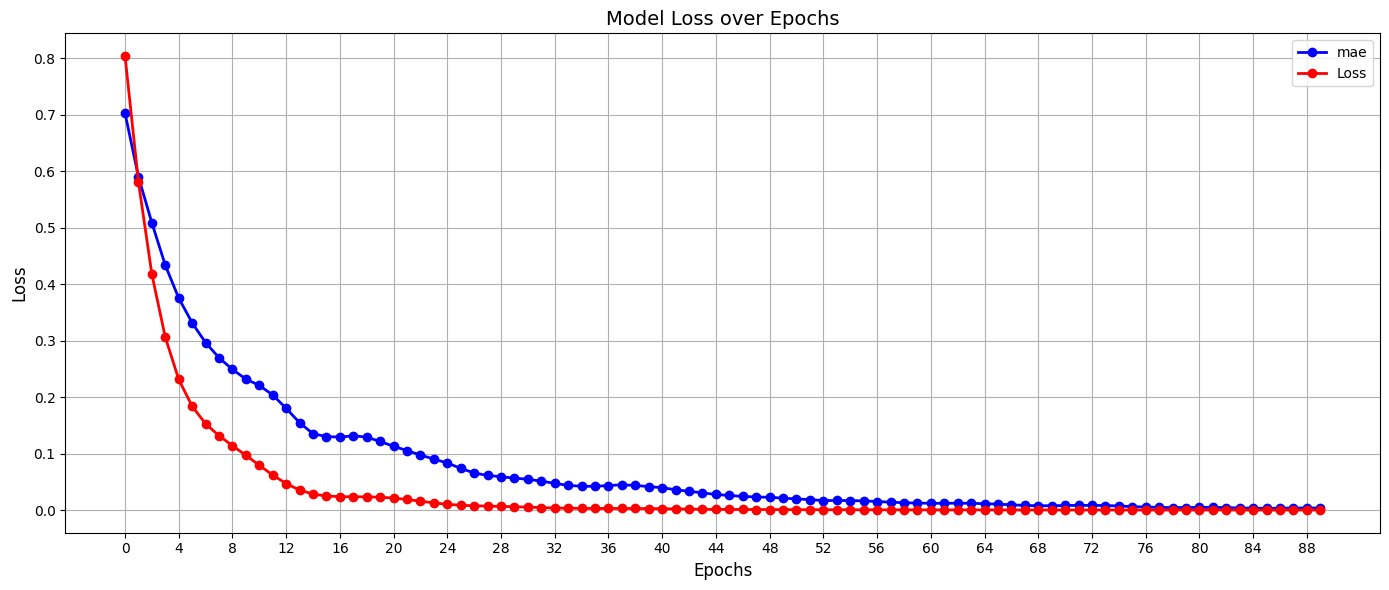

In [76]:
maes = history.history["mae"]
losses = history.history["loss"]

epochs = history.epoch


plt.figure(figsize=(14, 6))
# plt.subplot(1, 2, 2)
plt.plot(epochs, maes, color="blue", marker='o', linestyle='-', linewidth=2, markersize=6)
plt.plot(epochs, losses, color="red", marker='o', linestyle='-', linewidth=2, markersize=6)

plt.title('Model Loss over Epochs', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.grid(True)
plt.legend(["mae", 'Loss'], loc='best')
plt.xticks(np.arange(min(epochs), max(epochs) + 1, 4))

plt.tight_layout()
plt.show()

=> MAE: 0.8

### - LeakyReLu Activation

In [77]:
def gen_model(layers: list=[], input_shape: tuple=()):
    model = None
    if (len(layers) != 0):
        model = keras.models.Sequential(layers)
    else:
        model = keras.models.Sequential([
            keras.layers.Input(shape=input_shape),
            keras.layers.Dense(128, activation="leaky_relu"),
            keras.layers.Dense(128, activation="leaky_relu"),
            keras.layers.Dense(1, activation="linear")
            # keras.layers.Dense(3, activation="softmax")
        ])

    model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mae"])

    return model

early_stop = callbacks.EarlyStopping(monitor="loss", mode="min", min_delta=1e-7,patience=4, restore_best_weights=True, verbose=True)

model = gen_model(input_shape=(X.shape[1],))
history = model.fit(X_train, y_train, epochs=100, callbacks=[early_stop])



Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.2391 - mae: 0.8541
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.9131 - mae: 0.7433
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.6766 - mae: 0.6482
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.5138 - mae: 0.5749
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.4066 - mae: 0.5345
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.3377 - mae: 0.4922
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.2931 - mae: 0.4572
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.2604 - mae: 0.4185
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.2319 - mae: 0.3788
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.2030 - mae: 0.3405
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.1732 - mae: 0.3119
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1438 - mae: 0.2855
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step 

- Biểu đồ loss và MAE với mỗi epoch

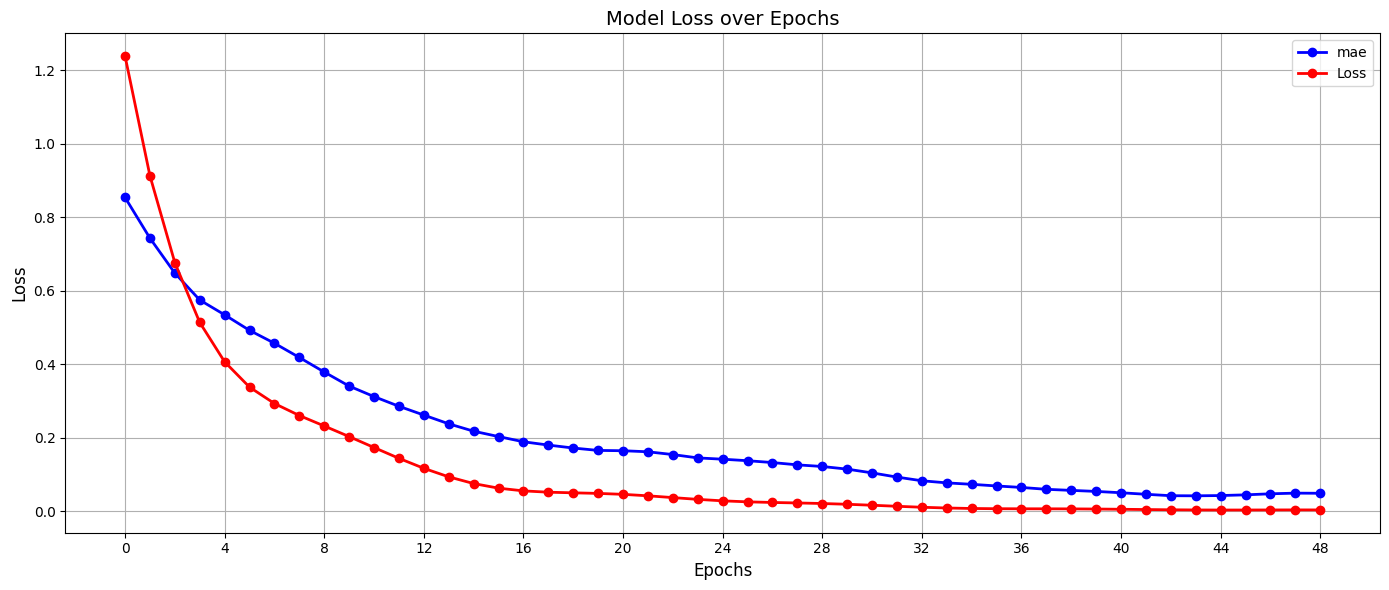

In [78]:
maes = history.history["mae"]
losses = history.history["loss"]

epochs = history.epoch


plt.figure(figsize=(14, 6))
# plt.subplot(1, 2, 2)
plt.plot(epochs, maes, color="blue", marker='o', linestyle='-', linewidth=2, markersize=6)
plt.plot(epochs, losses, color="red", marker='o', linestyle='-', linewidth=2, markersize=6)

plt.title('Model Loss over Epochs', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.grid(True)
plt.legend(["mae", 'Loss'], loc='best')
plt.xticks(np.arange(min(epochs), max(epochs) + 1, 4))

plt.tight_layout()
plt.show()

- So sánh sử dụng MAE

In [79]:
y_pred = model.predict(X_test)
np.mean(np.abs(y_pred[0] - y_test))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1.0201073265075684

=> MAE: 1.02

---

# Model PLS

In [80]:
pls = PLSRegression(n_components=5)
pls.fit(X_train, y_train)
y_pred = pls.predict(X_test)

- So sánh sử dụng MAE

In [81]:
np.mean(np.abs(y_pred[0] - y_test))


0.8453736787829909

=> MAE: 0.84